In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

from scipy.stats import chi2_contingency

%matplotlib inline

In [2]:
# Load the CSV file into a DataFrame
file_path = r"C:\Users\Admin\Downloads\dataset\amz_uk_price_prediction_dataset.csv"  # Use raw string by adding r in front of the path
# Load CSV into DataFrame
df = pd.read_csv(file_path)

In [3]:
df.shape

(2443651, 9)

In [4]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [5]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [28]:
# Removing outliers in product prices
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [29]:
### Part 1: Analyzing Best-Seller Trends Across Product Categories

##**Objective**: Understand the relationship between product categories and their best-seller status.

##1. **Crosstab Analysis**:
##    - Create a crosstab between the product `category` and the `isBestSeller` status.
crosstab = pd.crosstab(df['category'], df['isBestSeller'])    
##    - Are there categories where being a best-seller is more prevalent? 
crosstab['BestSeller_Proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])    	
##    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*
sorted_crosstab = crosstab.sort_values(by='BestSeller_Proportion', ascending=False)

print(sorted_crosstab)

##2. **Statistical Tests**:
##    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
chi2, p, dof, ex = chi2_contingency(crosstab.iloc[:, :-1])

print(chi2, p)
##    - Compute Cramér's V to understand the strength of association between best-seller status and category.
n = crosstab.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

print(cramers_v)
##3. **Visualizations**:
##	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_plot = crosstab.copy()
crosstab_plot['Total'] = crosstab_plot[True] + crosstab_plot[False]

crosstab_plot_norm = crosstab_plot.div(crosstab_plot['Total'], axis=0)

isBestSeller                      False  True  BestSeller_Proportion
category                                                            
Grocery                            9008   556               0.058135
Smart Home Security & Lighting       98     6               0.057692
Health & Personal Care             9017   552               0.057686
Mobile Phone Accessories            248    11               0.042471
Power & Hand Tools                 8353   306               0.035339
...                                 ...   ...                    ...
CD, Disc & Tape Players            8798     0               0.000000
General Music-Making Accessories    259     0               0.000000
Snowboard Boots                    1449     0               0.000000
Boxes & Organisers                  911     0               0.000000
eBook Readers & Accessories         246     0               0.000000

[296 rows x 3 columns]
36540.20270061387 0.0
0.08646706664522864


In [31]:
# Plot the normalized crosstab
crosstab_plot_norm = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_plot_norm[[False, True]].plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'])
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.title('Proportion of Best-Seller Status Across Product Categories')
plt.legend(['Not Best Seller', 'Best Seller'], loc='upper right')
plt.xticks(rotation=45)
plt.show()

sorted_crosstab, chi2, p, cramers_v

ValueError: Item wrong length 2 instead of 296.

In [14]:
# Plot the normalized crosstab
crosstab_plot_norm[[False, True]].plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'])
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.title('Proportion of Best-Seller Status Across Product Categories')
plt.legend(['Not Best Seller', 'Best Seller'], loc='upper right')
plt.xticks(rotation=45)
plt.show()

ValueError: Item wrong length 2 instead of 296.

In [32]:
### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

##**Objective**: Investigate how different product categories influence product prices.

##0. **Preliminary Step: Remove outliers in product prices.**

##	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
##	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

##1. **Violin Plots**:
##    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
##    - Which product category tends to have the highest median price? Don't filter here by top categories.

##2. **Bar Charts**:
##    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
##    - Which product category commands the highest average price? Don't filter here by top categories.

##3. **Box Plots**:
##    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
##    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


# Calculate Q1 and Q3 for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [34]:
# Get the top 20 categories by count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index

In [35]:
# Filter the dataframe to include only the top 20 categories
df_top_20_categories = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]


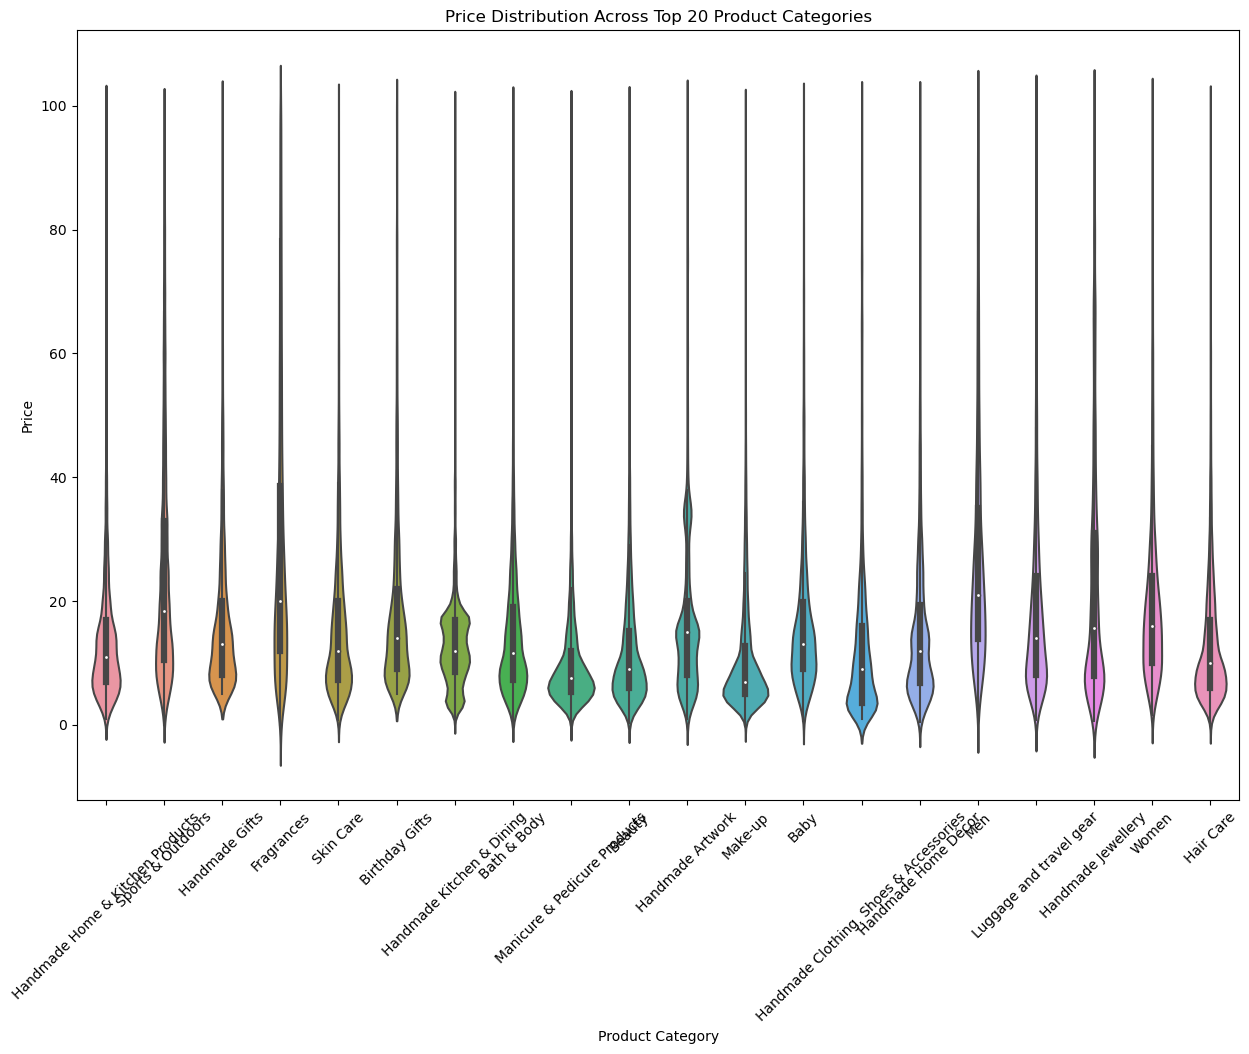

In [36]:
# Create violin plot for price distribution across top 20 categories
plt.figure(figsize=(15, 10))
sns.violinplot(x='category', y='price', data=df_top_20_categories)
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Identify category with highest median price without filtering top categories
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
highest_median_price_category = median_prices.idxmax()

highest_median_price_category, median_prices[highest_median_price_category]

('Desktop PCs', 74.0)

In [40]:
# Get the top 10 categories by count
top_10_categories = df_no_outliers['category'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 categories
df_top_10_categories = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Calculate the average price for top 10 categories
average_prices = df_top_10_categories.groupby('category')['price'].mean().sort_values(ascending=False)

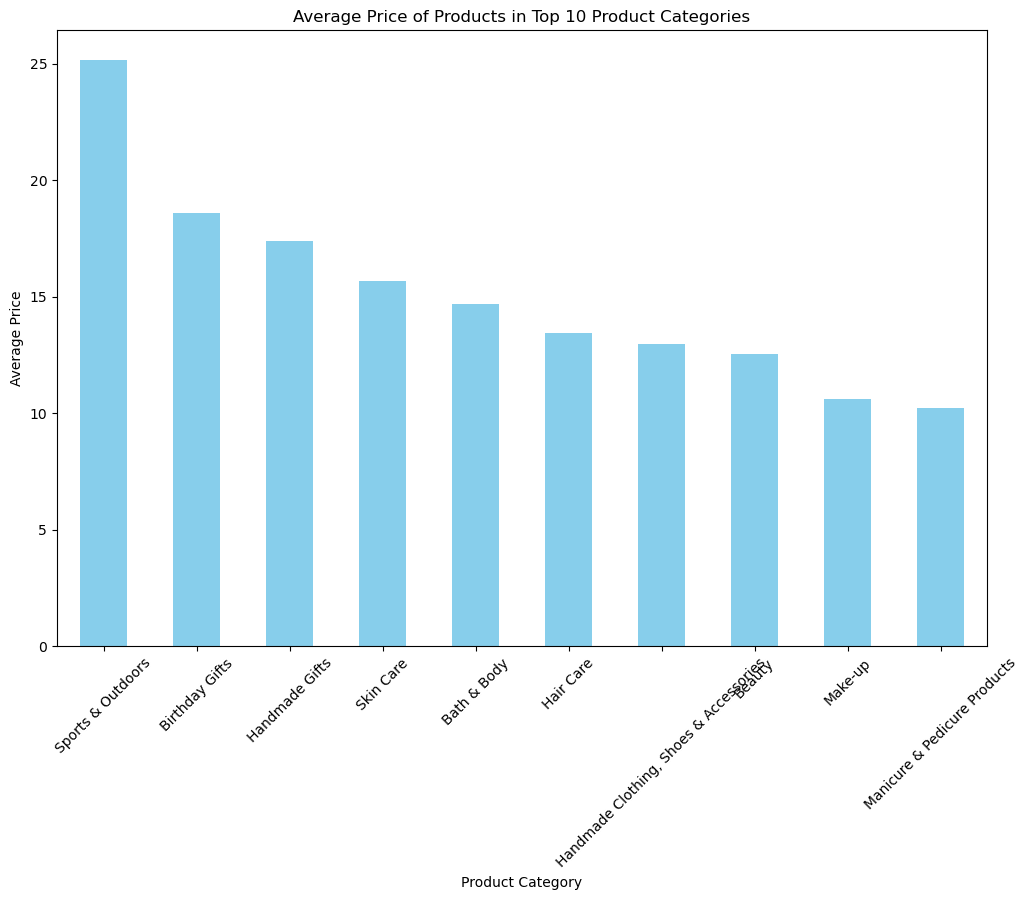

In [41]:
# Create bar chart for average price of products in top 10 categories
plt.figure(figsize=(12, 8))
average_prices.plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.title('Average Price of Products in Top 10 Product Categories')
plt.xticks(rotation=45)
plt.show()

In [42]:
highest_average_price_category = average_prices.idxmax()

highest_average_price_category, average_prices[highest_average_price_category]

('Sports & Outdoors', 25.17206487036301)

In [43]:
# Get the top 10 categories by count
top_10_categories_ratings = df_no_outliers['category'].value_counts().head(10).index

# Filter the dataframe to include only the top 10 categories for ratings
df_top_10_categories_ratings = df_no_outliers[df_no_outliers['category'].isin(top_10_categories_ratings)]

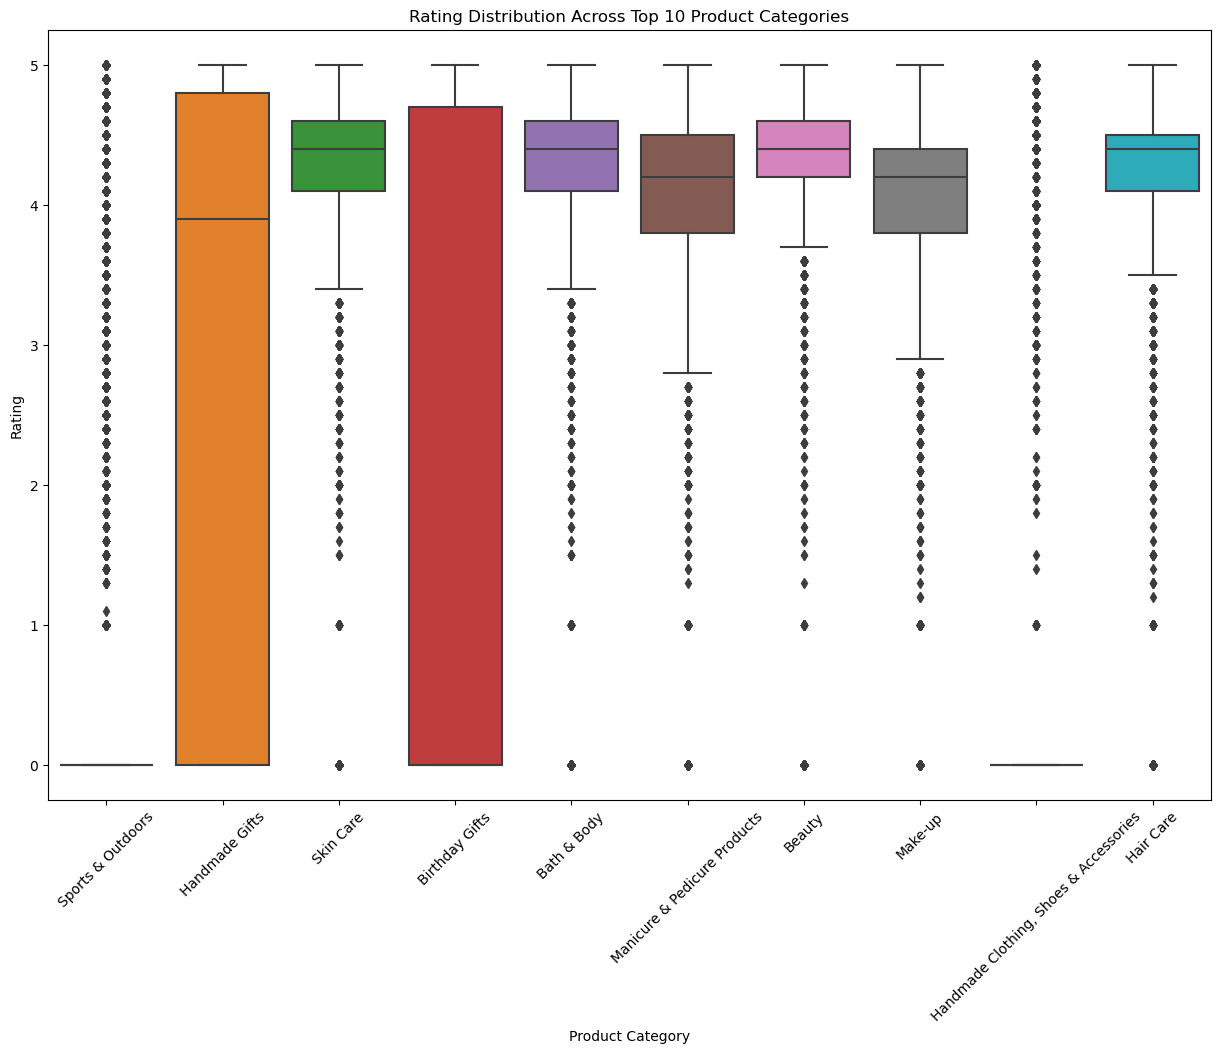

In [44]:
# Create box plots for ratings distribution across top 10 categories
plt.figure(figsize=(15, 10))
sns.boxplot(x='category', y='stars', data=df_top_10_categories_ratings)
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.title('Rating Distribution Across Top 10 Product Categories')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Identify category with highest median rating without filtering top categories
median_ratings = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
highest_median_rating_category = median_ratings.idxmax()

highest_median_rating_category, median_ratings[highest_median_rating_category]

('Computer Memory', 4.7)

In [46]:
# Calculate the correlation coefficient between price and stars
correlation_coefficient = df_no_outliers['price'].corr(df_no_outliers['stars'])
correlation_coefficient

-0.0776729987818137

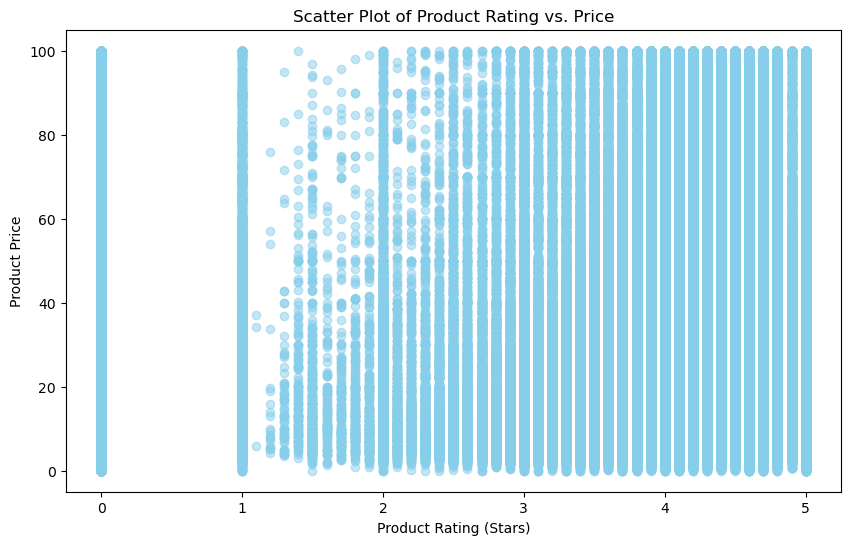

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['stars'], df_no_outliers['price'], alpha=0.5, color='skyblue')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Product Price')
plt.title('Scatter Plot of Product Rating vs. Price')
plt.show()

In [48]:
# Calculate the correlation matrix for numerical variables
correlation_matrix = df_no_outliers[['price', 'stars', 'reviews', 'boughtInLastMonth']].corr()


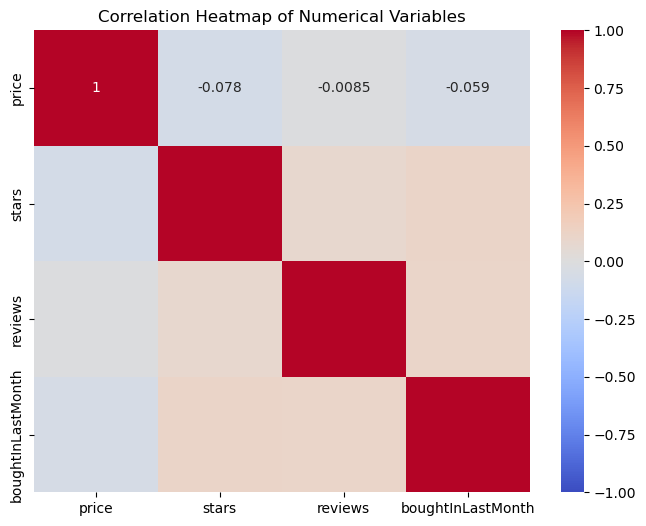

In [49]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

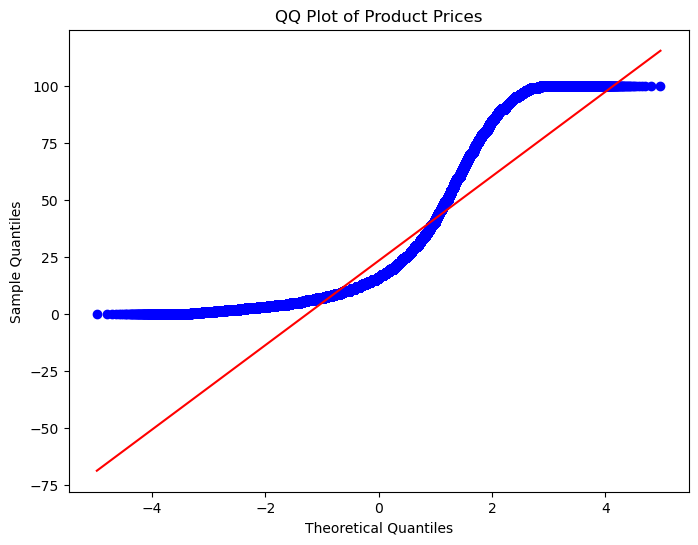

In [50]:
import scipy.stats as stats

# QQ plot for product prices
plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()